## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results,mouse_metadata, on="Mouse ID")

merge_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the DataFrame.
mouse_count = merge_df['Mouse ID'].nunique()
mouse_count

249

In [1]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = merge_df[merge_df.duplicated(['Mouse ID','Timepoint'],False)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[~merge_df['Mouse ID'].str.contains("g989")]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_df['Mouse ID'].nunique()
clean_mouse_count

248

In [ ]:
## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_group = clean_df.groupby(['Drug Regimen'])

tumor_mean = tumor_group['Tumor Volume (mm3)'].mean()
tumor_median = tumor_group['Tumor Volume (mm3)'].median()
tumor_variance = tumor_group['Tumor Volume (mm3)'].var()
tumor_standard_dev = tumor_group['Tumor Volume (mm3)'].std()
tumor_standard_error = tumor_group['Tumor Volume (mm3)'].sem()

tumor_df = pd.DataFrame({'Mean Tumor Volume': tumor_mean, 
                        'Median Tumor Volume':tumor_median, 
                        'Tumor Volume Variance':tumor_variance, 
                        'Tumor Volume Std. Dev.':tumor_standard_error,
                        'Tumor Volume Std. Err.':tumor_standard_error})

tumor_df
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,y793,45,48.158209,3,Male,24,25
Ceftamin,y865,45,68.923185,4,Male,24,30
Infubinol,z581,45,72.226731,4,Male,24,30
Ketapril,y260,45,78.567014,4,Male,24,30
Naftisol,z969,45,76.668817,4,Male,23,30
Placebo,y478,45,73.212939,4,Male,21,30
Propriva,z435,45,72.455421,4,Male,24,30
Ramicane,z578,45,47.622816,3,Male,23,25
Stelasyn,z314,45,75.123690,4,Male,23,30


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Bar Plots

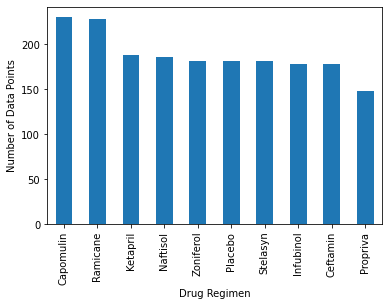

<Figure size 432x288 with 0 Axes>

In [37]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

time_point = clean_df['Drug Regimen'].value_counts()

bar_plot = time_point.plot(kind="bar")


plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()
plt.tight_layout()

In [ ]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

## Pie Plots

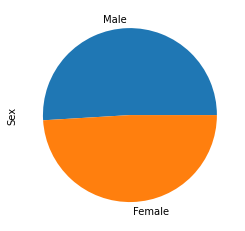

<Figure size 432x288 with 0 Axes>

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_dis = clean_df['Sex'].value_counts()
gender_plot = gender_dis.plot(kind="pie")

plt.show()
plt.tight_layout()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
